In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


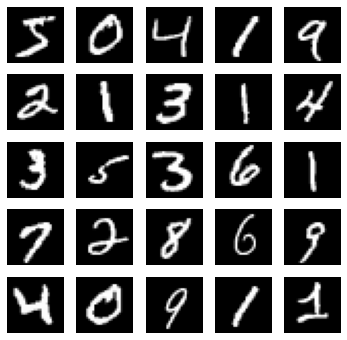

In [2]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

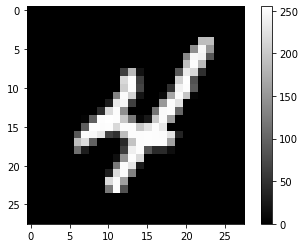

In [3]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

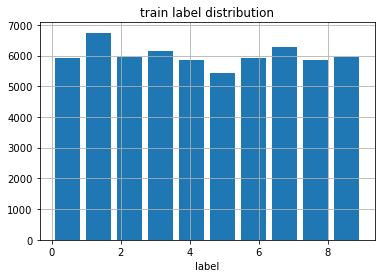

In [4]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')

plt.hist(t_train, bins=10, rwidth=0.8)

plt.show()

In [5]:
# 학습데이터 정답 분포 확인

label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [6]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩 (One-Hot Encoding)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, t_train, epochs=45, validation_split=0.3)

Epoch 1/45
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3113 - accuracy: 0.9126 - val_loss: 0.1929 - val_accuracy: 0.9443
Epoch 2/45
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1426 - accuracy: 0.9582 - val_loss: 0.1441 - val_accuracy: 0.9574
Epoch 3/45
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0998 - accuracy: 0.9708 - val_loss: 0.1175 - val_accuracy: 0.9657
Epoch 4/45
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0760 - accuracy: 0.9769 - val_loss: 0.1061 - val_accuracy: 0.9686
Epoch 5/45
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0588 - accuracy: 0.9828 - val_loss: 0.1058 - val_accuracy: 0.9685
Epoch 6/45
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.1008 - val_accuracy: 0.9705
Epoch 7/45
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0371 - accuracy: 0.9890 - val_loss: 0.1086 - val_accuracy:

In [10]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 609us/step - loss: 0.1389 - accuracy: 0.9781


[0.13894157111644745, 0.9781000018119812]

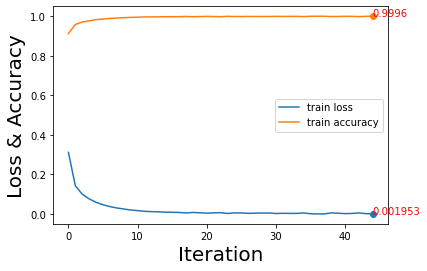

In [22]:
#plt.title("Centralize Learning Result", fontsize=25)
plt.xlabel("Iteration",fontsize=20)
plt.ylabel("Loss & Accuracy",fontsize=20)
#plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.scatter(44,1.1953e-04)
plt.text(44,1.1953e-04, '0.001953',color ='r')
#plt.text(x[44], loss_array_2[44], loss_array_2[44],color ='r')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.scatter(44, 0.9996)
plt.text(44, 0.9996, '0.9996',color ='r')
plt.legend()

plt.show()